In [2]:
import json
import pandas as pd

data = []
with open("/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json", "r") as data_file:
    for line in data_file:
        data.append(json.loads(line))  # Converte cada linha JSON para um dicionário

# Cria um DataFrame do Pandas
df = pd.DataFrame(data)

# Exibe as primeiras linhas
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


**Objetivo:** Prever a nota média do negócio

In [3]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [5]:
print(df['hours'][1])

{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}


In [6]:
df['hours'] = df['hours'].fillna("{}")

In [7]:
df['hours'].head()

0                                                   {}
1    {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2    {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4    {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
Name: hours, dtype: object

In [8]:
import ast

def ensure_dict(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)  # Converte string para dicionário
        except (ValueError, SyntaxError):
            return {}  # Retorna um dicionário vazio em caso de erro
    elif isinstance(value, dict):
        return value  # Já é um dicionário
    else:
        return {}  # Retorna um dicionário vazio para outros tipos

# Aplica a função para garantir que todos os valores em 'hours' sejam dicionários
df['hours'] = df['hours'].apply(ensure_dict)

In [9]:
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']:
    df[day + '_open'] = df['hours'].apply(lambda x: x.get(day, '0:0-0:0').split('-')[0])
    df[day + '_close'] = df['hours'].apply(lambda x: x.get(day, '0:0-0:0').split('-')[1])

In [10]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Tuesday_open,Tuesday_close,Wednesday_open,Wednesday_close,Thursday_open,Thursday_close,Friday_open,Friday_close,Saturday_open,Saturday_close
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,8:0,18:30,8:0,18:30,8:0,18:30,8:0,18:30,8:0,14:0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,8:0,22:0,8:0,22:0,8:0,22:0,8:0,23:0,8:0,23:0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,7:0,20:0,7:0,20:0,7:0,20:0,7:0,21:0,7:0,21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0:0,0:0,14:0,22:0,16:0,22:0,12:0,22:0,12:0,22:0


In [11]:
lista = ['Monday_open', 'Monday_close', 'Tuesday_open', 'Tuesday_close', 'Wednesday_open', 'Wednesday_close', 'Thursday_open', 'Thursday_close', 'Friday_open', 'Friday_close', 'Saturday_open', 'Saturday_close']

for l in lista:
    
    df[l] = df[l].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

In [12]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Tuesday_open,Tuesday_close,Wednesday_open,Wednesday_close,Thursday_open,Thursday_close,Friday_open,Friday_close,Saturday_open,Saturday_close
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,480,1110,480,1110,480,1110,480,1110,480,840
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,480,1320,480,1320,480,1320,480,1380,480,1380
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,420,1200,420,1200,420,1200,420,1260,420,1260
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,840,1320,960,1320,720,1320,720,1320


In [13]:
df['Minuts_Open_Per_Week'] = (df['Monday_close'] - df['Monday_open']) + (df['Tuesday_close'] - df['Tuesday_open']) + (df['Wednesday_close'] - df['Wednesday_open']) + (df['Thursday_close'] - df['Thursday_open']) + (df['Friday_close'] - df['Friday_open']) + (df['Saturday_close'] - df['Saturday_open'])

In [14]:
df = df.drop(columns=[
    'Monday_open', 'Monday_close',
    'Tuesday_open', 'Tuesday_close', 
    'Wednesday_open', 'Wednesday_close', 
    'Thursday_open', 'Thursday_close', 
    'Friday_open', 'Friday_close', 
    'Saturday_open', 'Saturday_close',
    'hours'
])

In [15]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,Minuts_Open_Per_Week
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...",2880
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...",5160
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4800
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food",2040


In [16]:
df['attributes'] = df['attributes'].fillna("{}")

In [17]:
df['attributes'] = df['attributes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_attributes = df['attributes'].apply(pd.Series)

df_attributes.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_attributes = df_attributes.fillna(False)

In [19]:
df = pd.concat([df, df_attributes], axis=1)
df.drop(columns=['attributes'], inplace=True)

As colunas são strings representando dicionários. Preciso converter para dicionários antes de expandir

In [20]:
df['BusinessParking'] = df['BusinessParking'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('{') else x)

In [21]:
df_parking = df['BusinessParking'].apply(lambda x: x if isinstance(x, dict) else {}).apply(pd.Series)
df_parking = df_parking.add_prefix('BusinessParking_')
df_parking = df_parking.fillna(False)

df = pd.concat([df, df_parking], axis=1)
df.drop(columns=['BusinessParking'], inplace=True)

<ipython-input-21-5e07b8517816>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_parking = df_parking.fillna(False)


In [22]:
df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,False,False,False,False,False,False,False,False,False,False
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df = df.replace({True: 1, False: 0})

<ipython-input-23-0ea0dd73b5d1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [24]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,0,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,0,0,0,0,0,0,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,0,0,0,0,0,0,0,1,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,0,1,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,1,0


In [25]:
df.isnull().sum()

business_id                     0
name                            0
address                         0
city                            0
state                           0
postal_code                     0
latitude                        0
longitude                       0
stars                           0
review_count                    0
is_open                         0
categories                    103
Minuts_Open_Per_Week            0
ByAppointmentOnly               0
BusinessAcceptsCreditCards      0
BikeParking                     0
RestaurantsPriceRange2          0
CoatCheck                       0
RestaurantsTakeOut              0
RestaurantsDelivery             0
Caters                          0
WiFi                            0
WheelchairAccessible            0
HappyHour                       0
OutdoorSeating                  0
HasTV                           0
RestaurantsReservations         0
DogsAllowed                     0
Alcohol                         0
GoodForKids   

In [26]:
df['stars'].unique()

array([5. , 3. , 3.5, 4. , 4.5, 2. , 2.5, 1.5, 1. ])

In [27]:
import numpy as np

bins = [1, 3.9, 5]
labels = ['Restaurante não bem avaliado', 'Restaurante bem avaliado']

avaliacoes_categorizadas = pd.cut(df['stars'].to_numpy(), bins=bins, labels=labels)

df['Avaliacao'] = avaliacoes_categorizadas

df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,0,0,0,Restaurante bem avaliado
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,0,0,0,0,0,0,0,Restaurante não bem avaliado
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,0,0,0,0,0,0,1,0,Restaurante não bem avaliado
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,1,0,0,0,Restaurante bem avaliado
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,1,0,Restaurante bem avaliado


In [28]:
df = df.drop('stars', axis=1)

df['Avaliacao'] = df['Avaliacao'].replace({'Restaurante não bem avaliado': 0, 'Restaurante bem avaliado': 1})

<ipython-input-28-f9261f903e8e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Avaliacao'] = df['Avaliacao'].replace({'Restaurante não bem avaliado': 0, 'Restaurante bem avaliado': 1})
<ipython-input-28-f9261f903e8e>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Avaliacao'] = df['Avaliacao'].replace({'Restaurante não bem avaliado': 0, 'Restaurante bem avaliado': 1})


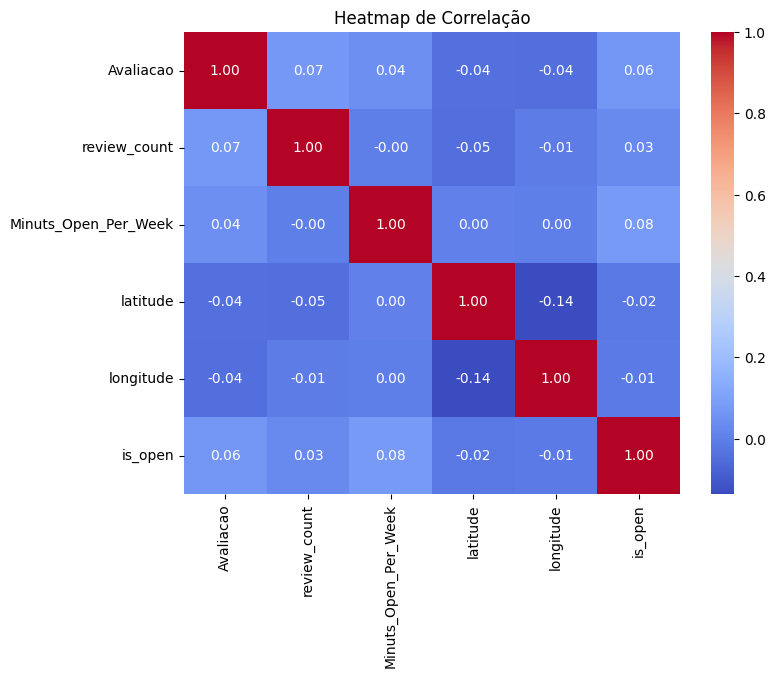

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Avaliacao', 'review_count', 'Minuts_Open_Per_Week', 'latitude', 'longitude',
            'is_open']
df_corr = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap de Correlação')
plt.show()

Possivelmente excluir MinutsOpen_per_Week, is_open

In [30]:
df = df.drop(['is_open', 'Minuts_Open_Per_Week', 'business_id', 'name'], axis=1)

In [31]:
df.head(2)

,address,city,state,postal_code,latitude,longitude,review_count,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,...,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,7,"Doctors, Traditional Chinese Medicine, Naturop...",True,0,...,0,0,0,0,0,0,0,0,0,1
1,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,15,"Shipping Centers, Local Services, Notaries, Ma...",0,True,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df = df.drop('review_count', axis=1)
df.head()

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",True,0,0,...,0,0,0,0,0,0,0,0,0,1
1,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,"Shipping Centers, Local Services, Notaries, Ma...",0,True,0,...,0,0,0,0,0,0,0,0,0,0
2,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,"Department Stores, Shopping, Fashion, Home & G...",False,True,True,...,0,0,0,0,0,0,0,1,0,0
3,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",False,False,True,...,0,0,0,0,0,1,0,0,0,1
4,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,"Brewpubs, Breweries, Food",0,True,True,...,0,0,0,0,0,0,0,1,0,1


In [33]:
df.head(2)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",True,0,0,...,0,0,0,0,0,0,0,0,0,1
1,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,"Shipping Centers, Local Services, Notaries, Ma...",0,True,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.neighbors import BallTree

raios = [0.5, 1.0, 2.0, 5.0]

coord = np.radians(df[['latitude', 'longitude']])

tree = BallTree(coord, metric='haversine')

for raio in raios:
    df[f'densidade_{raio}km'] = tree.query_radius(coord, r=raio/6371, count_only=True) - 1

In [35]:
df.head(2)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao,densidade_0.5km,densidade_1.0km,densidade_2.0km,densidade_5.0km
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",True,0,0,...,0,0,0,0,0,1,173,801,1948,3336
1,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,"Shipping Centers, Local Services, Notaries, Ma...",0,True,0,...,0,0,0,0,0,0,25,34,99,850


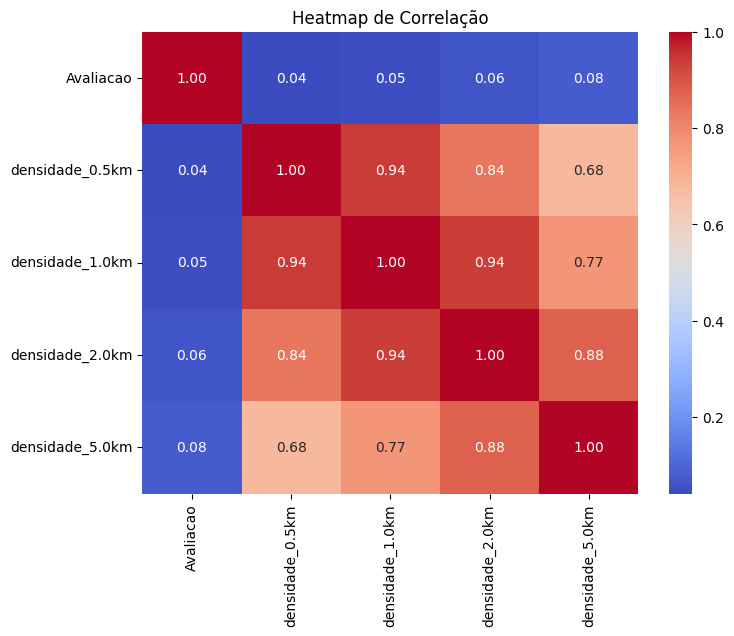

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Avaliacao', 'densidade_0.5km', 'densidade_1.0km', 'densidade_2.0km', 'densidade_5.0km']
df_corr = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap de Correlação')
plt.show()

In [37]:
df = df.drop(['densidade_0.5km', 'densidade_1.0km', 
              'densidade_2.0km', 'densidade_5.0km'], axis=1)

In [38]:
df.head(2)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",True,0,0,...,0,0,0,0,0,0,0,0,0,1
1,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,"Shipping Centers, Local Services, Notaries, Ma...",0,True,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  object  
 8   BusinessAcceptsCreditCards  150346 non-null  object  
 9   BikeParking                 150346 non-null  object  
 10  RestaurantsPriceRange2      150346 non-null  object  
 11  CoatCheck                   150346 non-null  object  
 12  RestaurantsTakeOut          150346 non-null  object  
 13 

In [40]:
df = df.replace({"True": 1, "False": 0})
df.head(2)

<ipython-input-40-6948a5721330>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"True": 1, "False": 0})


,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,"Shipping Centers, Local Services, Notaries, Ma...",0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  object  
 8   BusinessAcceptsCreditCards  150346 non-null  object  
 9   BikeParking                 150346 non-null  object  
 10  RestaurantsPriceRange2      150346 non-null  object  
 11  CoatCheck                   150346 non-null  object  
 12  RestaurantsTakeOut          150346 non-null  object  
 13 

In [42]:
df = df.replace({"None": 0})

<ipython-input-42-3cd1d4d49fb2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"None": 0})


In [43]:
colunas_booleanas = [
    'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking', 
    'RestaurantsPriceRange2'
]
for col in colunas_booleanas:
    print(f"Valores únicos em {col}: {df[col].unique()}")

Valores únicos em ByAppointmentOnly: [1 0]
Valores únicos em BusinessAcceptsCreditCards: [0 1]
Valores únicos em BikeParking: [0 1]
Valores únicos em RestaurantsPriceRange2: [0 '2' '1' '3' '4']


In [44]:
df['RestaurantsPriceRange2'] = df['RestaurantsPriceRange2'].replace({
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4
}).astype(int)

<ipython-input-44-a00f920427f8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RestaurantsPriceRange2'] = df['RestaurantsPriceRange2'].replace({


In [45]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

address: 122844 valores únicos
city: 1416 valores únicos
state: 27 valores únicos
postal_code: 3362 valores únicos
latitude: 135593 valores únicos
longitude: 131918 valores únicos
categories: 83160 valores únicos
ByAppointmentOnly: 2 valores únicos
BusinessAcceptsCreditCards: 2 valores únicos
BikeParking: 2 valores únicos
RestaurantsPriceRange2: 5 valores únicos
CoatCheck: 2 valores únicos
RestaurantsTakeOut: 2 valores únicos
RestaurantsDelivery: 2 valores únicos
Caters: 2 valores únicos
WiFi: 7 valores únicos
WheelchairAccessible: 2 valores únicos
HappyHour: 2 valores únicos
OutdoorSeating: 2 valores únicos
HasTV: 2 valores únicos
RestaurantsReservations: 2 valores únicos
DogsAllowed: 2 valores únicos
Alcohol: 7 valores únicos
GoodForKids: 2 valores únicos
RestaurantsAttire: 7 valores únicos
Ambience: 2414 valores únicos
RestaurantsTableService: 2 valores únicos
RestaurantsGoodForGroups: 2 valores únicos
DriveThru: 2 valores únicos
NoiseLevel: 9 valores únicos
GoodForMeal: 518 valores

In [46]:
from sklearn.ensemble import RandomForestClassifier

features = ['BusinessAcceptsCreditCards','CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters']
X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                      Feature  Importance
3         RestaurantsDelivery    0.440899
4                      Caters    0.232796
2          RestaurantsTakeOut    0.191552
0  BusinessAcceptsCreditCards    0.120066
1                   CoatCheck    0.014686


'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2', CoatCheck  RestaurantsTakeOut, RestaurantsDelivery, Caters

In [47]:
df = df.drop(['CoatCheck'], axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [49]:
df['WiFi'].unique()

array([0, "u'no'", "u'free'", "'free'", "'no'", "u'paid'", "'paid'"],
      dtype=object)

In [50]:
df['WiFi'] = df['WiFi'].replace({
    "u'no'": 'no',
    "'no'": 'no',
    "u'free'": 'free',
    "'free'": 'free',
    "u'paid'": 'paid',
    "'paid'": 'paid'
})

In [51]:
df['WiFi'] = df['WiFi'].apply(lambda x: 1 if x != "no" else 0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [53]:
features = ['RestaurantsReservations', 'DogsAllowed', 'WiFi', 'HappyHour', 'OutdoorSeating', 'HasTV']

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                   Feature  Importance
1              DogsAllowed    0.483595
5                    HasTV    0.378518
4           OutdoorSeating    0.050671
0  RestaurantsReservations    0.034754
3                HappyHour    0.029009
2                     WiFi    0.023454


'WiFi', 'HappyHour', 'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 

In [54]:
df = df.drop(['WiFi', 'HappyHour', 'OutdoorSeating', 'RestaurantsReservations'], axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [56]:
df['Alcohol'].unique()

array([0, "u'none'", "u'full_bar'", "'none'", "'full_bar'",
       "u'beer_and_wine'", "'beer_and_wine'"], dtype=object)

In [57]:
df['Alcohol'] = df['Alcohol'].replace({
    "u'none'": "none",
    "u'full_bar'": "full_bar",
    "'none'": "none",
    "'full_bar'": "full_bar",
    "u'beer_and_wine'": "beer_and_wine",
    "'beer_and_wine'": "beer_and_wine"
})

In [58]:
df['Alcohol'].unique()

array([0, 'none', 'full_bar', 'beer_and_wine'], dtype=object)

In [59]:
df['Alcohol'] = df['Alcohol'].replace("none",0)

In [60]:
df['Alcohol'].unique()

array([0, 'full_bar', 'beer_and_wine'], dtype=object)

In [61]:
df['Alcohol'] = df['Alcohol'].replace(0, 'none')
df = pd.get_dummies(df, columns=['Alcohol'], prefix='Alcohol')

In [62]:
df.head(2)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Avaliacao,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",1,0,0,...,0,0,0,0,0,0,1,False,False,True
1,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,"Shipping Centers, Local Services, Notaries, Ma...",0,1,0,...,0,0,0,0,0,0,0,False,False,True


In [63]:
features = ['Alcohol_beer_and_wine', 'Alcohol_full_bar', 'Alcohol_none']

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f].fillna(0)

<ipython-input-63-aab9a6d4257e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})


In [64]:
features = ['Alcohol_beer_and_wine', 'Alcohol_full_bar', 'Alcohol_none']

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                 Feature  Importance
1       Alcohol_full_bar    0.483344
0  Alcohol_beer_and_wine    0.328049
2           Alcohol_none    0.188607


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [66]:
df['RestaurantsAttire'].unique()

array([0, "u'casual'", "'casual'", "u'formal'", "'dressy'", "u'dressy'",
       "'formal'"], dtype=object)

In [67]:
df['RestaurantsAttire'] = df['RestaurantsAttire'].replace({
    "u'casual'": "casual",
    "u'formal'": "formal",
    "'casual'": "casual",
    "'formal'": "formal",
    "u'dressy'": "dressy",
    "'dressy'": "dressy"
})

In [68]:
df['RestaurantsAttire'].unique()

array([0, 'casual', 'formal', 'dressy'], dtype=object)

In [69]:
df['RestaurantsAttire'] = df['RestaurantsAttire'].replace({
    "casual": 1,
    "formal": 2,
    "dressy": 3
})

<ipython-input-69-4b71ae2ff66c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RestaurantsAttire'] = df['RestaurantsAttire'].replace({


In [70]:
features = ['Avaliacao', 'GoodForKids', 'RestaurantsAttire']

df_corr = df[features].corr()

df_corr

,Avaliacao,GoodForKids,RestaurantsAttire
Avaliacao,1.000000,-0.041668,-0.100304
GoodForKids,-0.041668,1.000000,0.634146
RestaurantsAttire,-0.100304,0.634146,1.000000


In [71]:
df = df.drop('GoodForKids', axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [73]:
df['Ambience'].unique()

array([0,
       "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}",
       "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}",
       ...,
       "{'touristy': False, 'hipster': None, 'romantic': False, 'divey': None, 'intimate': None, 'trendy': False, 'upscale': None, 'classy': True, 'casual': None}",
       "{'touristy': False, 'hipster': None, 'romantic': False, 'intimate': None, 'trendy': True, 'upscale': False, 'classy': False, 'casual': True}",
       "{'touristy': None, 'hipster': False, 'romantic': False, 'divey': None, 'intimate': False, 'trendy': False, 'upscale': None, 'classy': None, 'casual': True}"],
      dtype=object)

In [74]:
default_ambience = "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"
df['Ambience'] = df['Ambience'].replace(0, default_ambience)

In [75]:
df['Ambience'] = df['Ambience'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [76]:
ambience_df = df['Ambience'].apply(pd.Series)

df = pd.concat([df, ambience_df], axis=1)

df.drop(columns=['Ambience'], inplace=True)

In [77]:
df['romantic'].unique()

array([False, None, True, nan], dtype=object)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [79]:
features = ['romantic', 'intimate', 'touristy', 'hipster', 'divey', 'classy', 'trendy', 'upscale', 
            'casual']

for f in features:
    df[f] = df[f].replace("None", False)
    df[f] = df[f].fillna(False)

<ipython-input-79-da5351f9ea0f>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].fillna(False)


In [80]:
features = ['romantic', 'intimate', 'touristy', 'hipster', 'divey', 'classy', 'trendy', 'upscale', 
            'casual']

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})

<ipython-input-80-6e4151f4a0ca>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})


In [81]:
features_criadas = ['romantic', 'intimate', 'touristy', 'hipster', 'divey', 
                     'classy', 'trendy', 'upscale', 'casual']  # Adicione outras que criou

X = df[features_criadas]  # Mantém só as features criadas
y = df['Avaliacao']  # Target (avaliação do restaurante)

In [82]:
y = y.fillna(0)  # Substituir NaN por 0 (ou use outro valor)

In [83]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Criar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X, y)

# Pegar a importância das features
importances = model.feature_importances_

# Criar um DataFrame para visualizar melhor
feature_importance_df = pd.DataFrame({'Feature': features_criadas, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibir as features ordenadas pela importância
print(feature_importance_df)

    Feature  Importance
5    classy    0.264106
3   hipster    0.225665
6    trendy    0.146079
8    casual    0.116279
1  intimate    0.115519
2  touristy    0.039123
4     divey    0.036238
0  romantic    0.035775
7   upscale    0.021217


In [84]:
df = df.drop(['touristy', 'divey', 'romantic', 'upscale'], axis=1)

In [85]:
features = ['RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru']

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                    Feature  Importance
2                 DriveThru    0.498100
1  RestaurantsGoodForGroups    0.306101
0   RestaurantsTableService    0.195799


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [87]:
df['NoiseLevel'].unique()

array([0, "u'average'", "u'quiet'", "'average'", "u'loud'",
       "u'very_loud'", "'quiet'", "'very_loud'", "'loud'"], dtype=object)

In [88]:
df['NoiseLevel'] = df['NoiseLevel'].replace({
    "u'average'": "average",
    "u'quiet'": "quiet",
    "'average'": "average",
    "u'loud'": "loud",
    "u'very_loud'": "very_loud",
    "'quiet'": "quiet",
    "'very_loud'": "very_loud",
    "'loud'": "loud"
})

In [89]:
df['NoiseLevel'].unique()

array([0, 'average', 'quiet', 'loud', 'very_loud'], dtype=object)

In [90]:
df['NoiseLevel'] = df['NoiseLevel'].replace(0, "quiet")

In [91]:
df = pd.get_dummies(df, columns=['NoiseLevel'], prefix='NoiseLevel')

In [92]:
features = ['NoiseLevel_average', 'NoiseLevel_loud', 'NoiseLevel_quiet', 'NoiseLevel_very_loud']

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f].fillna(0)

<ipython-input-92-af854f3ddbd2>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})


In [93]:
df.head(1)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,Alcohol_none,intimate,hipster,classy,trendy,casual,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [94]:
features = ['NoiseLevel_average', 'NoiseLevel_loud', 'NoiseLevel_quiet', 'NoiseLevel_very_loud']

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
3  NoiseLevel_very_loud    0.320606
2      NoiseLevel_quiet    0.258050
1       NoiseLevel_loud    0.255431
0    NoiseLevel_average    0.165913


In [95]:
default_gfm = "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"
df['GoodForMeal'] = df['GoodForMeal'].replace(0, default_gfm)


df['GoodForMeal'] = df['GoodForMeal'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [97]:
ambience_df = df['GoodForMeal'].apply(pd.Series)

df = pd.concat([df, ambience_df], axis=1)

df.drop(columns=['GoodForMeal'], inplace=True)

In [98]:
features = ['dessert', 'latenight', 'lunch', 'dinner', 'brunch', 'breakfast']

for f in features:

    df[f] = df[f].replace({False: 0, True: 1})
    

    df[f] = df[f].fillna(0)
    

    df[f] = df[f].astype(int)


<ipython-input-98-858744dd7ca2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-98-858744dd7ca2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-98-858744dd7ca2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [99]:
df.head(1)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,dessert,latenight,lunch,dinner,brunch,breakfast
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 59 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [101]:
features = ['dessert', 'latenight', 'lunch', 'dinner', 'brunch', 'breakfast']

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
1  latenight    0.214675
4     brunch    0.194357
3     dinner    0.187095
2      lunch    0.182405
5  breakfast    0.137237
0    dessert    0.084231


In [102]:
df = df.drop('dessert', axis=1)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 58 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

"BusinessAcceptsBitcoin"

In [104]:
df['Smoking'].unique()

array([0, "u'no'", "u'outdoor'", "u'yes'", "'outdoor'", "'no'"],
      dtype=object)

In [105]:
df['Smoking'] = df['Smoking'].replace({
    "u'no'": 0,
    "u'outdoor'": 1,
    "u'yes'": 2,
    "'outdoor'": 1,
    "'no'": 0
    
})

<ipython-input-105-7eee1a24b333>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking'] = df['Smoking'].replace({


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 58 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [107]:
default_msc = "{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}"
df['Music'] = df['Music'].replace(0, default_msc)


df['Music'] = df['Music'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [108]:
df_msc = df['Music'].apply(pd.Series)

df = pd.concat([df, df_msc], axis=1)

df.drop(columns=['Music'], inplace=True)

In [109]:
features = ['dj', 'background_music', 'no_music', 'jukebox', 'live', 'video', 'karaoke']

for f in features:

    df[f] = df[f].replace({False: 0, True: 1})
    
    df[f] = df[f].fillna(0)
    
    df[f] = df[f].astype(int)

<ipython-input-109-e03f1e84380a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-109-e03f1e84380a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-109-e03f1e84380a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [111]:
features = ['BusinessAcceptsBitcoin', 'Smoking', 'dj', 'background_music', 
            'no_music', 'jukebox', 'live', 'video', 'karaoke', 'GoodForDancing', 
            'AcceptsInsurance']


X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                   Feature  Importance
0   BusinessAcceptsBitcoin    0.329250
2                       dj    0.199521
1                  Smoking    0.158577
9           GoodForDancing    0.076680
5                  jukebox    0.067381
6                     live    0.064626
8                  karaoke    0.044408
3         background_music    0.037967
7                    video    0.013803
10        AcceptsInsurance    0.007787
4                 no_music    0.000000


In [112]:
df = df.drop(['live', 'jukebox', 'karaoke', 'background_music', 'video', 'no_music', 
              'GoodForDancing', 'AcceptsInsurance'], axis=1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [114]:
def parse_best_nights(value):
    if value == 0:
        return {
            'monday': False,
            'tuesday': False,
            'wednesday': False,
            'thursday': False,
            'friday': False,
            'saturday': False,
            'sunday': False
        }
    try:
        nights_dict = ast.literal_eval(value)
        return {key.strip("u'"): val for key, val in nights_dict.items()}
    except:
        return value

df['BestNights'] = df['BestNights'].apply(parse_best_nights)

In [115]:
df['BestNights'] = df['BestNights'].apply(lambda x: str(x) if x != 0 else x)

In [116]:
df['BestNights'] = df['BestNights'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [117]:
BN_df = df['BestNights'].apply(pd.Series)

df = pd.concat([df, BN_df], axis=1)

df.drop(columns=['BestNights'], inplace=True)

In [118]:
df.head(1)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,brunch,breakfast,dj,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",1,0,0,...,0,0,0,False,False,False,False,False,False,False


In [119]:
features = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f] = df[f].fillna(0)
    df[f] = df[f].astype(int)

<ipython-input-119-91b1ced9eb0e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-119-91b1ced9eb0e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-119-91b1ced9eb0e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [120]:
df.head(1)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,brunch,breakfast,dj,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
features = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
1    tuesday    0.156065
5   saturday    0.149829
3   thursday    0.145480
6     sunday    0.145306
2  wednesday    0.135948
4     friday    0.134139
0     monday    0.133233


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 62 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [123]:
features = ['BYOB', 'Corkage']


X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

   Feature  Importance
0     BYOB    0.553042
1  Corkage    0.446958


In [124]:
df['BYOBCorkage'].unique()

array([0, "'yes_free'", "'no'", "'yes_corkage'", "u'yes_free'",
       "u'yes_corkage'", "u'no'"], dtype=object)

In [125]:
df['BYOBCorkage'] = df['BYOBCorkage'].replace({
    "'yes_free'": "yes",
    "'no'": "no",
    "'yes_corkage'": "corkage",
    "u'yes_free'": "yes",
    "u'yes_corkage'": "corkage",
    "u'no'": "no"   
})

In [126]:
df['BYOBCorkage'] = df['BYOBCorkage'].replace(0, "no")

In [127]:
df['BYOBCorkage'].unique()

array(['no', 'yes', 'corkage'], dtype=object)

In [128]:
df = pd.get_dummies(df, columns=['BYOBCorkage'], prefix='BYOBCorkage')

In [129]:
features = ['BYOBCorkage_corkage', 'BYOBCorkage_no', 'BYOBCorkage_yes']

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f] = df[f].fillna(0)
    df[f] = df[f].astype(int)

<ipython-input-129-66872f99ea69>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-129-66872f99ea69>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-129-66872f99ea69>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [130]:
features = ['BYOBCorkage_corkage', 'BYOBCorkage_no', 'BYOBCorkage_yes']


X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

               Feature  Importance
0  BYOBCorkage_corkage     0.52452
2      BYOBCorkage_yes     0.28417
1       BYOBCorkage_no     0.19131


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [132]:
def parse_HairSpecializesIn(value):
    if value == 0:
        return {
            'straightperms': False,
            'coloring': False,
            'extensions': False,
            'africanamerican': False,
            'curly': False,
            'kids': False,
            'perms': False,
            'asian': False
        }
    try:
        hs_dict = ast.literal_eval(value)
        return {key.strip("u'"): val for key, val in hs_dict.items()}
    except:
        return value

df['HairSpecializesIn'] = df['HairSpecializesIn'].apply(parse_HairSpecializesIn)

In [133]:
df['HairSpecializesIn'] = df['HairSpecializesIn'].apply(lambda x: str(x) if x != 0 else x)

In [134]:
df['HairSpecializesIn'] = df['HairSpecializesIn'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [135]:
HS_df = df['HairSpecializesIn'].apply(pd.Series)

df = pd.concat([df, HS_df], axis=1)

df.drop(columns=['HairSpecializesIn'], inplace=True)

In [136]:
features = ['straightperms', 'coloring', 'extensions', 'africanamerican', 'curly', 'kids', 'perms',
            'asian']

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f] = df[f].fillna(0)
    df[f] = df[f].astype(int)

<ipython-input-136-b0bdcd74f0ff>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-136-b0bdcd74f0ff>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-136-b0bdcd74f0ff>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [137]:
features = ['straightperms', 'coloring', 'extensions', 'africanamerican', 'curly', 'kids', 'perms',
            'asian']

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
1         coloring    0.283662
4            curly    0.152757
2       extensions    0.115753
7            asian    0.113565
0    straightperms    0.104256
6            perms    0.095489
5             kids    0.085747
3  africanamerican    0.048770


In [138]:
df = df.drop(['perms', 'kids', 'africanamerican'], axis=1)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 68 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [140]:
df['AgesAllowed'].unique()

array([0, "u'21plus'", "u'allages'", "u'18plus'"], dtype=object)

In [141]:
df['AgesAllowed'] = df['AgesAllowed'].replace({
    0: "allages",
    "u'21plus'": "+21",
    "u'allages'": "allages",
    "u'18plus'": "+18"
})

In [142]:
df = pd.get_dummies(df, columns=['AgesAllowed'], prefix='AgesAllowed')

In [143]:
features = ['AgesAllowed_+18', 'AgesAllowed_+21', 'AgesAllowed_allages']

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f] = df[f].fillna(0)
    df[f] = df[f].astype(int)

<ipython-input-143-2edcec7b6496>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-143-2edcec7b6496>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-143-2edcec7b6496>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [144]:
features = ['AgesAllowed_+18', 'AgesAllowed_+21', 'AgesAllowed_allages']

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

               Feature  Importance
1      AgesAllowed_+21    0.510035
2  AgesAllowed_allages    0.383246
0      AgesAllowed_+18    0.106719


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [146]:
def parse_DietaryRestrictions(value):
    if value == 0:
        return {
            'dairy-free': False,
            'gluten-free': False,
            'vegan': False,
            'kosher': False,
            'halal': False,
            'soy-free': False,
            'vegetarian': False
        }
    try:
        Dietary_dict = ast.literal_eval(value)
        return {key.strip("u'"): val for key, val in Dietary_dict.items()}
    except:
        return value

df['DietaryRestrictions'] = df['DietaryRestrictions'].apply(parse_DietaryRestrictions)

In [147]:
df['DietaryRestrictions'] = df['DietaryRestrictions'].apply(lambda x: str(x) if x != 0 else x)

In [148]:
df['DietaryRestrictions'] = df['DietaryRestrictions'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else x)

In [149]:
DR_df = df['DietaryRestrictions'].apply(pd.Series)

df = pd.concat([df, DR_df], axis=1)

df.drop(columns=['DietaryRestrictions'], inplace=True)

In [150]:
features = ['dairy-free', 'gluten-free', 'vegan', 'kosher', 'halal', 'soy-free', 'vegetarian']

for f in features:
    df[f] = df[f].replace({False: 1, True: 1})
    df[f] = df[f].fillna(0)
    df[f] = df[f].astype(int)

<ipython-input-150-d085fd279896>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 1, True: 1})
<ipython-input-150-d085fd279896>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 1, True: 1})
<ipython-input-150-d085fd279896>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [151]:
df.head(1)

,address,city,state,postal_code,latitude,longitude,categories,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,...,AgesAllowed_+18,AgesAllowed_+21,AgesAllowed_allages,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,"Doctors, Traditional Chinese Medicine, Naturop...",1,0,0,...,0,0,1,1,1,1,1,1,1,1


In [152]:
features = ['dairy-free', 'gluten-free', 'vegan', 'kosher', 'halal', 'soy-free', 'vegetarian']


X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
0   dairy-free         0.0
1  gluten-free         0.0
2        vegan         0.0
3       kosher         0.0
4        halal         0.0
5     soy-free         0.0
6   vegetarian         0.0


In [153]:
df = df.drop(['dairy-free', 'gluten-free', 
              'vegan', 'kosher', 'halal', 
              'soy-free', 'vegetarian'], axis=1)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 69 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   categories                  150243 non-null  object  
 7   ByAppointmentOnly           150346 non-null  int64   
 8   BusinessAcceptsCreditCards  150346 non-null  int64   
 9   BikeParking                 150346 non-null  int64   
 10  RestaurantsPriceRange2      150346 non-null  int64   
 11  RestaurantsTakeOut          150346 non-null  int64   
 12  RestaurantsDelivery         150346 non-null  int64   
 13 

In [155]:
df['categories'].unique()

array(['Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
       'Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services',
       'Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores',
       ...,
       'Shopping, Jewelry, Piercing, Toy Stores, Beauty & Spas, Accessories, Fashion',
       'Fitness/Exercise Equipment, Eyewear & Opticians, Shopping, Sporting Goods, Bikes',
       'Beauty & Spas, Permanent Makeup, Piercing, Tattoo'], dtype=object)

In [156]:
df['categories'] = df['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [157]:
from collections import Counter

category_counts = Counter([cat for sublist in df['categories'] for cat in sublist])

common_categories = [cat for cat, _ in category_counts.most_common(20)]

for cat in common_categories:
    df[cat] = df['categories'].apply(lambda x: 1 if cat in x else 0)

In [158]:
df = df.drop('categories', axis=1)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 88 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   address                     150346 non-null  object  
 1   city                        150346 non-null  object  
 2   state                       150346 non-null  object  
 3   postal_code                 150346 non-null  object  
 4   latitude                    150346 non-null  float64 
 5   longitude                   150346 non-null  float64 
 6   ByAppointmentOnly           150346 non-null  int64   
 7   BusinessAcceptsCreditCards  150346 non-null  int64   
 8   BikeParking                 150346 non-null  int64   
 9   RestaurantsPriceRange2      150346 non-null  int64   
 10  RestaurantsTakeOut          150346 non-null  int64   
 11  RestaurantsDelivery         150346 non-null  int64   
 12  Caters                      150346 non-null  int64   
 13 

In [160]:
features = [
    "Restaurants", "Food", "Shopping", "Home Services", "Beauty & Spas", 
    "Nightlife", "Health & Medical", "Local Services", "Bars", "Automotive", 
    "Event Planning & Services", "Sandwiches", "American (Traditional)", 
    "Active Life", "Pizza", "Coffee & Tea", "Fast Food", "Breakfast & Brunch", 
    "American (New)", "Hotels & Travel"
]

X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                      Feature  Importance
16                  Fast Food    0.258360
1                        Food    0.091694
19            Hotels & Travel    0.072728
13                Active Life    0.071492
10  Event Planning & Services    0.054850
2                    Shopping    0.050298
12     American (Traditional)    0.046604
14                      Pizza    0.043023
0                 Restaurants    0.042149
9                  Automotive    0.037391
4               Beauty & Spas    0.034551
15               Coffee & Tea    0.033746
6            Health & Medical    0.029288
17         Breakfast & Brunch    0.023783
3               Home Services    0.020402
11                 Sandwiches    0.020049
18             American (New)    0.019214
7              Local Services    0.018835
5                   Nightlife    0.017908
8                        Bars    0.013634


In [161]:
df = df.drop(columns=[
    "Food", "Hotels & Travel", "Active Life", "Event Planning & Services",
    "Shopping", "American (Traditional)", "Pizza", "Restaurants",
    "Automotive", "Beauty & Spas", "Coffee & Tea", "Health & Medical",
    "Breakfast & Brunch", "Home Services", "Sandwiches", "American (New)",
    "Local Services", "Nightlife", "Bars"
])

In [162]:
df.head(1)

,address,city,state,postal_code,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,...,BYOBCorkage_yes,straightperms,coloring,extensions,curly,asian,AgesAllowed_+18,AgesAllowed_+21,AgesAllowed_allages,Fast Food
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [163]:
df['postal_code'].unique()

array(['93101', '63123', '85711', ..., 'T5J 1A9', '33595', 'T5J 4X6'],
      dtype=object)

In [164]:
df = df.drop('postal_code', axis=1)

In [165]:
df.head(1)

,address,city,state,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,...,BYOBCorkage_yes,straightperms,coloring,extensions,curly,asian,AgesAllowed_+18,AgesAllowed_+21,AgesAllowed_allages,Fast Food
0,"1616 Chapala St, Ste 2",Santa Barbara,CA,34.426679,-119.711197,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [166]:
df['city'] = df['city'].str.title()

In [167]:
df['city'] = df['city'].str.upper()

In [168]:
df['city'].head(2)

0    SANTA BARBARA
1           AFFTON
Name: city, dtype: object

In [169]:
city_counts = df['city'].value_counts()

print(city_counts)

city
PHILADELPHIA                14576
TUCSON                       9260
TAMPA                        9068
INDIANAPOLIS                 7542
NASHVILLE                    6978
                            ...  
LAND-O-LAKES                    1
NORTH COVENTRY                  1
CENTER CITY PHILADELPHIA        1
OXNARD                          1
UPPER MORELAND                  1
Name: count, Length: 1273, dtype: int64


In [170]:
city_counts = df['city'].value_counts()
threshold = 1200 

df['city_grouped'] = df['city'].apply(lambda x: x if city_counts[x] >= threshold else 'Outras')


In [171]:
df['city_grouped'].unique()

array(['SANTA BARBARA', 'Outras', 'TUCSON', 'PHILADELPHIA', 'NASHVILLE',
       'INDIANAPOLIS', 'CLEARWATER', 'NEW ORLEANS', 'EDMONTON', 'RENO',
       'BOISE', 'WILMINGTON', 'SPARKS', 'TAMPA', 'SAINT LOUIS',
       'METAIRIE', 'SAINT PETERSBURG', 'ST. LOUIS', 'FRANKLIN'],
      dtype=object)

In [172]:
df = df.drop('city', axis=1)

In [173]:
df.head(1)

,address,state,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsDelivery,...,straightperms,coloring,extensions,curly,asian,AgesAllowed_+18,AgesAllowed_+21,AgesAllowed_allages,Fast Food,city_grouped
0,"1616 Chapala St, Ste 2",CA,34.426679,-119.711197,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,SANTA BARBARA


In [174]:
df_encoded = pd.get_dummies(df['city_grouped'], prefix='city')
df = pd.concat([df, df_encoded], axis=1)

In [175]:
df = df.drop('city_grouped', axis=1)

In [176]:
features = [
    "city_BOISE",
    "city_CLEARWATER",
    "city_EDMONTON",
    "city_FRANKLIN",
    "city_INDIANAPOLIS",
    "city_METAIRIE",
    "city_NASHVILLE",
    "city_NEW ORLEANS",
    "city_Outras",
    "city_PHILADELPHIA",
    "city_RENO",
    "city_SAINT LOUIS",
    "city_SAINT PETERSBURG",
    "city_SANTA BARBARA",
    "city_SPARKS",
    "city_ST. LOUIS",
    "city_TAMPA",
    "city_TUCSON",
    "city_WILMINGTON"
]

for f in features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f] = df[f].fillna(0)
    df[f] = df[f].astype(int)

<ipython-input-176-082e4fc4594e>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-176-082e4fc4594e>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-176-082e4fc4594e>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [177]:
features = [
    "city_BOISE",
    "city_CLEARWATER",
    "city_EDMONTON",
    "city_FRANKLIN",
    "city_INDIANAPOLIS",
    "city_METAIRIE",
    "city_NASHVILLE",
    "city_NEW ORLEANS",
    "city_Outras",
    "city_PHILADELPHIA",
    "city_RENO",
    "city_SAINT LOUIS",
    "city_SAINT PETERSBURG",
    "city_SANTA BARBARA",
    "city_SPARKS",
    "city_ST. LOUIS",
    "city_TAMPA",
    "city_TUCSON",
    "city_WILMINGTON"
]


X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                  Feature  Importance
13     city_SANTA BARBARA    0.343152
8             city_Outras    0.213983
7        city_NEW ORLEANS    0.175658
2           city_EDMONTON    0.086835
10              city_RENO    0.049667
18        city_WILMINGTON    0.026544
5           city_METAIRIE    0.020400
12  city_SAINT PETERSBURG    0.013060
0              city_BOISE    0.012260
6          city_NASHVILLE    0.009822
9       city_PHILADELPHIA    0.009423
17            city_TUCSON    0.009240
16             city_TAMPA    0.006003
11       city_SAINT LOUIS    0.005608
15         city_ST. LOUIS    0.005386
4       city_INDIANAPOLIS    0.004650
3           city_FRANKLIN    0.003847
1         city_CLEARWATER    0.002625
14            city_SPARKS    0.001835


In [178]:
# Lista de colunas importantes (com importância > 0.02)
features_relevantes = [
    "city_SANTA BARBARA",
    "city_Outras",
    "city_NEW ORLEANS",
    "city_EDMONTON",
    "city_RENO",
    "city_WILMINGTON",
    "city_METAIRIE"
]

# Remover as colunas não relevantes
df = df.drop(columns=[col for col in df.columns if col.startswith("city_") and col not in features_relevantes])

In [179]:
df.head(1)

,address,state,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsDelivery,...,AgesAllowed_+21,AgesAllowed_allages,Fast Food,city_EDMONTON,city_METAIRIE,city_NEW ORLEANS,city_Outras,city_RENO,city_SANTA BARBARA,city_WILMINGTON
0,"1616 Chapala St, Ste 2",CA,34.426679,-119.711197,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [180]:
features = ['latitude', 'longitude']
X = df[features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
0   latitude    0.502292
1  longitude    0.497708


In [181]:
df = df.drop('address', axis=1)

In [182]:
df.head(1)

,state,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsDelivery,Caters,...,AgesAllowed_+21,AgesAllowed_allages,Fast Food,city_EDMONTON,city_METAIRIE,city_NEW ORLEANS,city_Outras,city_RENO,city_SANTA BARBARA,city_WILMINGTON
0,CA,34.426679,-119.711197,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [183]:
df['state'].unique()

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

In [184]:
state_coded = pd.get_dummies(df['state'], prefix='state')
df = pd.concat([df, state_coded], axis=1)

In [185]:
df = df.drop('state', axis=1)

In [186]:
state_features = [
    'state_AB', 'state_AZ', 'state_CA', 'state_CO', 'state_DE', 'state_FL',
    'state_HI', 'state_ID', 'state_IL', 'state_IN', 'state_LA', 'state_MA',
    'state_MI', 'state_MO', 'state_MT', 'state_NC', 'state_NJ', 'state_NV',
    'state_PA', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VI',
    'state_VT', 'state_WA', 'state_XMS'
]

for f in state_features:
    df[f] = df[f].replace({False: 0, True: 1})
    df[f] = df[f].fillna(0)
    df[f] = df[f].astype(int)

<ipython-input-186-b8eaa3ce95fc>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-186-b8eaa3ce95fc>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f] = df[f].replace({False: 0, True: 1})
<ipython-input-186-b8eaa3ce95fc>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [187]:
state_features = [
    'state_AB', 'state_AZ', 'state_CA', 'state_CO', 'state_DE', 'state_FL',
    'state_HI', 'state_ID', 'state_IL', 'state_IN', 'state_LA', 'state_MA',
    'state_MI', 'state_MO', 'state_MT', 'state_NC', 'state_NJ', 'state_NV',
    'state_PA', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VI',
    'state_VT', 'state_WA', 'state_XMS'
]


X = df[state_features]  # Mantém só as features criadas
y = df['Avaliacao']


y = y.fillna(0)


model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X,y)

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': state_features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

      Feature  Importance
2    state_CA    0.422497
16   state_NJ    0.099991
0    state_AB    0.084590
4    state_DE    0.074953
17   state_NV    0.069432
8    state_IL    0.064770
10   state_LA    0.057740
13   state_MO    0.023615
18   state_PA    0.020818
7    state_ID    0.019735
5    state_FL    0.017900
20   state_TN    0.012788
9    state_IN    0.012323
1    state_AZ    0.009450
11   state_MA    0.001135
21   state_TX    0.001106
3    state_CO    0.000867
12   state_MI    0.000860
19   state_SD    0.000700
23   state_VI    0.000690
6    state_HI    0.000612
25   state_WA    0.000605
26  state_XMS    0.000603
22   state_UT    0.000598
15   state_NC    0.000552
14   state_MT    0.000538
24   state_VT    0.000532


In [188]:
# Lista das features a serem removidas com base nas importâncias
features_to_remove = [
    'state_XMS', 'state_UT', 'state_NC', 'state_MT', 'state_VT', 'state_WA',
    'state_HI', 'state_VI', 'state_TX', 'state_MA', 'state_PA', 'state_IL',
    'state_AZ', 'state_FL', 'state_DE', 'state_LA', 'state_MO', 'state_NJ',
    'state_CA'
]

# Removendo as colunas irrelevantes do DataFrame
df = df.drop(columns=features_to_remove)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   latitude                    150346 non-null  float64 
 1   longitude                   150346 non-null  float64 
 2   ByAppointmentOnly           150346 non-null  int64   
 3   BusinessAcceptsCreditCards  150346 non-null  int64   
 4   BikeParking                 150346 non-null  int64   
 5   RestaurantsPriceRange2      150346 non-null  int64   
 6   RestaurantsTakeOut          150346 non-null  int64   
 7   RestaurantsDelivery         150346 non-null  int64   
 8   Caters                      150346 non-null  int64   
 9   WheelchairAccessible        150346 non-null  int64   
 10  HasTV                       150346 non-null  int64   
 11  DogsAllowed                 150346 non-null  int64   
 12  RestaurantsAttire           150346 non-null  int64   
 13 

In [189]:
df.head(1)

,latitude,longitude,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsDelivery,Caters,WheelchairAccessible,...,city_SANTA BARBARA,city_WILMINGTON,state_AB,state_CO,state_ID,state_IN,state_MI,state_NV,state_SD,state_TN
0,34.426679,-119.711197,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   latitude                    150346 non-null  float64 
 1   longitude                   150346 non-null  float64 
 2   ByAppointmentOnly           150346 non-null  int64   
 3   BusinessAcceptsCreditCards  150346 non-null  int64   
 4   BikeParking                 150346 non-null  int64   
 5   RestaurantsPriceRange2      150346 non-null  int64   
 6   RestaurantsTakeOut          150346 non-null  int64   
 7   RestaurantsDelivery         150346 non-null  int64   
 8   Caters                      150346 non-null  int64   
 9   WheelchairAccessible        150346 non-null  int64   
 10  HasTV                       150346 non-null  int64   
 11  DogsAllowed                 150346 non-null  int64   
 12  RestaurantsAttire           150346 non-null  int64   
 13 

In [191]:
df['Avaliacao'] = df['Avaliacao'].fillna(0)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   latitude                    150346 non-null  float64 
 1   longitude                   150346 non-null  float64 
 2   ByAppointmentOnly           150346 non-null  int64   
 3   BusinessAcceptsCreditCards  150346 non-null  int64   
 4   BikeParking                 150346 non-null  int64   
 5   RestaurantsPriceRange2      150346 non-null  int64   
 6   RestaurantsTakeOut          150346 non-null  int64   
 7   RestaurantsDelivery         150346 non-null  int64   
 8   Caters                      150346 non-null  int64   
 9   WheelchairAccessible        150346 non-null  int64   
 10  HasTV                       150346 non-null  int64   
 11  DogsAllowed                 150346 non-null  int64   
 12  RestaurantsAttire           150346 non-null  int64   
 13 

In [193]:
X = df.drop('Avaliacao', axis=1)
y = df['Avaliacao']

In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [196]:
model = RandomForestClassifier(class_weight='balanced')

param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
}

In [197]:
grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=2,
                          scoring='accuracy')

In [198]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [199]:
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [200]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [201]:
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.6521782507482541


In [202]:
print("F1_score:", f1_score(y_test, y_pred))

F1_score: 0.6337756924262055


In [204]:
model_gb = GradientBoostingClassifier()

param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2], 
            'max_depth': [3, 5, 7]
}

In [205]:
grid_search_gb = GridSearchCV(estimator=model_gb,
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=2,
                          scoring='accuracy')

In [206]:
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [208]:
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)

In [209]:
print("Acurácia:", accuracy_score(y_test, y_pred_gb))

Acurácia: 0.6547056867309611


In [210]:
print("F1_Score:", f1_score(y_test, y_pred_gb))

F1_Score: 0.6428399435863921


In [212]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.8, 1.0]  
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [213]:
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)

In [214]:
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))

Acurácia: 0.66015962753575


In [215]:
print("F1 Score:", f1_score(y_test, y_pred_xgb))

F1 Score: 0.6469023185100722


In [222]:
import joblib

melhor_modelo = grid_search.best_estimator_

joblib.dump(melhor_modelo, 'best_model.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!
